<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [115]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [116]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [117]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['NaN']=df.isna().sum()
des.loc['NaN%']=(df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
NaN,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
NaN%,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [118]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

df2 = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'] ]

In [120]:
# Alumno, elimine aquellas filas que tengan columnas vacias

# No se encontraron filas con columnas vacías, pero opero según lo indicado
df2 = df2.dropna()


In [121]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

print('Cantidad de filas para realizar la observacion:', df2.shape[0])

Cantidad de filas para realizar la observacion: 714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [122]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df2.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [123]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó

# Cuento las frecuencias (sí: 1/no: 0) de supervivencia
df2['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

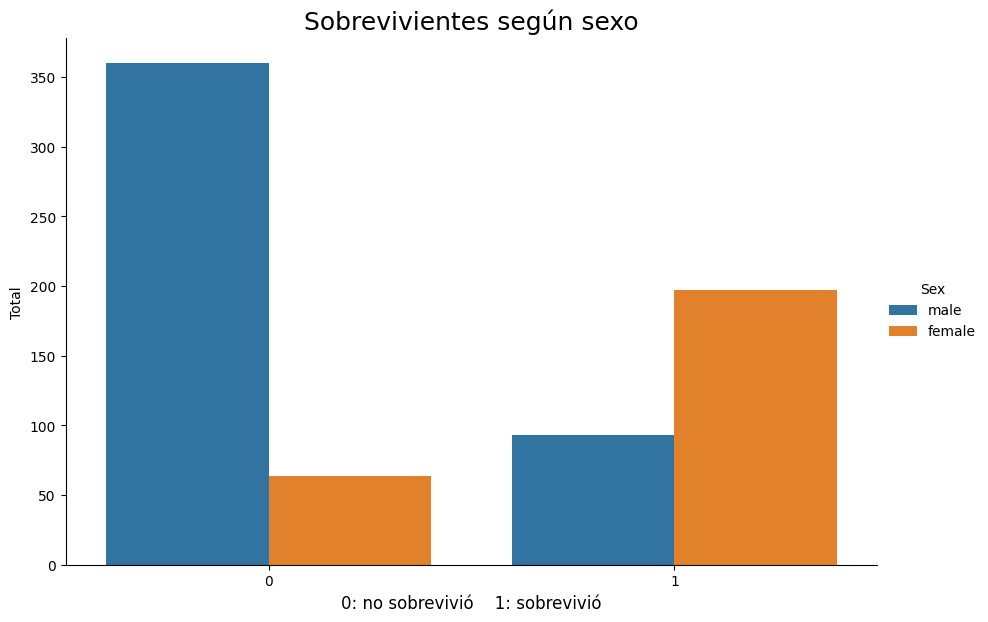

In [124]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"


sns.catplot(x = "Survived", data = df2, kind = "count", hue = "Sex", height=6, aspect=1.5); #no encuentro cómo modificar 0 y 1, por 'no' y 'sí', respectivamente, con catplot (kind='count')

plt.xlabel("0: no sobrevivió    1: sobrevivió", size=12) #encontré esta forma =( Pero no reconoce el comando \t para espacios con tab.
plt.ylabel("Total")
plt.title("Sobrevivientes según sexo", size=18)

plt.show()


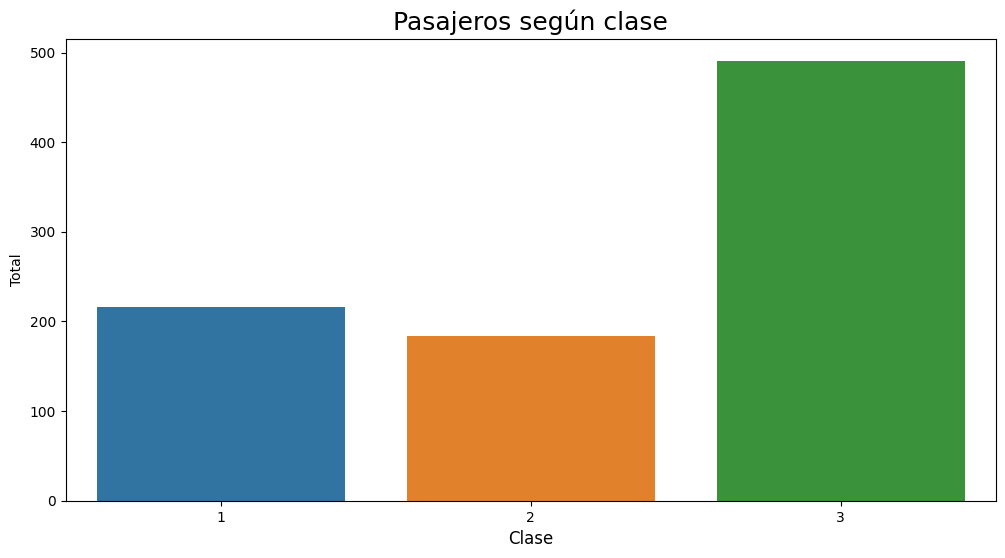

In [125]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

plt.figure(figsize=(12,6))
sns.countplot(x=df["Pclass"])
plt.xlabel("Clase", size=12)
plt.ylabel("Total")
plt.title("Pasajeros según clase", size=18)


plt.show()

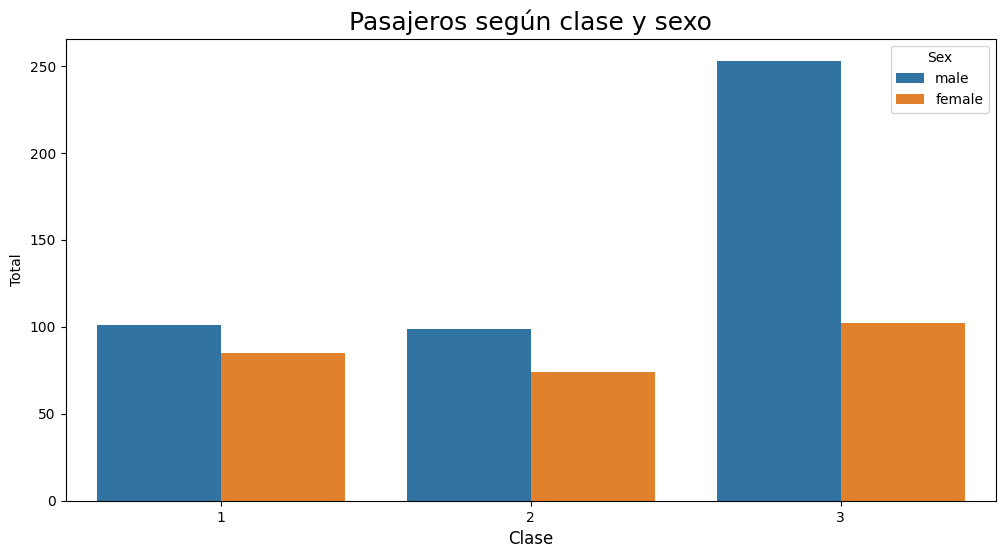

In [126]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

plt.figure(figsize=(12,6))
sns.countplot(data=df2, x='Pclass', hue='Sex')
plt.xlabel("Clase", size=12)
plt.ylabel("Total")
plt.title("Pasajeros según clase y sexo", size=18)

plt.show()

#### Transformar variables categóricas texto a clases numeradas

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df2.copy()

In [129]:
# Utiliza el LabelEncoder para codificar la columna Sex, reemplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

lencod_sex = LabelEncoder()
label_encoding = lencod_sex.fit_transform(df_cod['Sex'])

#Sugerencia (consultado): Como existe una única columna categorica a transformar ('Sex') y ésta tiene sólo dos clases ('Male' y 'Female') con sólo aplicar el LaberEncoder,
#ya se tiene el resultado deseado.
df_cod['Sex'] = label_encoding

label_encoding





array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [130]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

lencod_sex.classes_

array(['female', 'male'], dtype=object)

In [131]:
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [132]:
# Alumno, genere un numpy array "X" que posea todos los features (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

X = df_cod.drop('Survived', axis=1).values #en el array X, todos MENOS "Survived"
y = df_cod['Survived'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [133]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42);

In [134]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test

from sklearn.neighbors import KNeighborsClassifier

# Creo -y entreno- el objeto de la clase KNeighborsclassifier() con n=2, pues sabemos que son 2 posibles valores para 'survived'.
clf_knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

# Guardo los resultados de las predicciones
y_hat_knn = clf_knn.predict(X_test)


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [135]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)

from sklearn.metrics import accuracy_score
print(f'Exactitud del clasificador elegido -KNN-: {accuracy_score(y_test, y_hat_knn, normalize=True)}')



Exactitud del clasificador elegido -KNN-: 0.7162790697674418


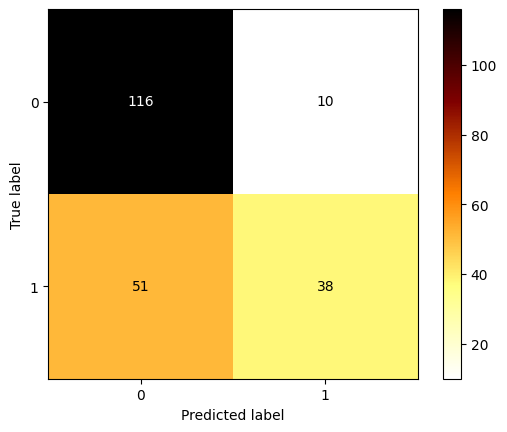

In [136]:
# Alumno, dibujar la matriz de confusion


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creo la matriz -objeto- con los 2 valores a comparar
cm_knn = confusion_matrix(y_test, y_hat_knn)

# Creo la variable que almacenará la representación gráfica de la matriz
cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=clf_knn.classes_) ##############################################

# Especifico mapa de colores a utilizar (cmap=plt.cm.<COLOR>)
cmd_knn.plot(cmap=plt.cm.afmhot_r)

# Muestro la figura 

plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [ ]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

resp = int(input('Ingrese 1 para probar modelo o 0 para salir:\n'))
if resp == 0:
    print('Aburrid@, abandona sin jugar!. Adiós!.')

while resp!=0 and resp!=1:
    resp= int(input('Ingreso inválido. Ingrese 1 para probar modelo o 0 para salir:\n'))  
    #if resp == 0:
        #print('Adiós!')


    #while resp != 0 and resp ==1:
    while resp ==1:
        clase = int(input('Ingresar clase de un pasajero: 1, 2 o 3:\n'))
        genre = str(input('Ingresar género: "female" o "male":\n'))
        age = int(input('Ingresar edad de un pasajero:\n'))
        sibs = int(input('Ingresar nro. de hermanos/pareja a bordo:\n'))
        sons = int(input('Ingresar nro. de hijos a bordo:\n'))

        sex_encoded = int(lencod_sex.transform([genre])) #transformo la variable genre de acuerdo al label encoder utilizado previamente.
        X_prueba = np.array([clase, sex_encoded, age, sibs, sons]) # creo vector de prueba, con los datos ingresados x teclado

        #X_prueba Para poder ejecutar el modelo predictivo, transformo X_prueba a un array de tamaño 1*n.
        X_prueba = X_prueba.reshape(1, -1)
        y_prueba = clf_knn.predict(X_prueba)

        #mesaje/resultado de la ejecución
        if y_prueba == 1:
            print('Te salvarías ;)\n\n')
        else:
            print('Te hundirías =(\n\n')

        resp= int(input('¿Jugar de nuevo?. Ingrese 1 para probar modelo, o 0 para salir:\n'))
    if resp == 0:
        print('Gracias por jugar!. Vuelva prontoS!.')


